## Monocular Depth Estimation

In [1]:
import cv2
import torch

import numpy as np
from skimage.metrics import structural_similarity as ssim

import matplotlib.pyplot as plt

from depth_anything_v2.dpt import DepthAnythingV2

xFormers not available
xFormers not available


In [2]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

### Disparity Estimation

In [3]:
model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
}
encoder = 'vits'

model_s = DepthAnythingV2(**model_configs[encoder])
model_s.load_state_dict(torch.load(f'checkpoints/depth_anything_v2_{encoder}.pth', map_location='cpu'))
model_s = model_s.to(DEVICE).eval()

In [4]:
def normalize(image):
    return 255 * (image - np.min(image)) / (np.max(image) - np.min(image)).astype("uint8")

In [5]:
def test_image(path, model):
    raw_img = cv2.imread(path)
    depth = model.infer_image(raw_img) # HxW raw depth map in numpy
    depth = normalize(depth)
    plt.imshow(depth, cmap='gray')
    plt.axis("off") 
    plt.title("Depth Map")
    return depth

Trying on 466.png image

(-0.5, 1919.5, 1199.5, -0.5)

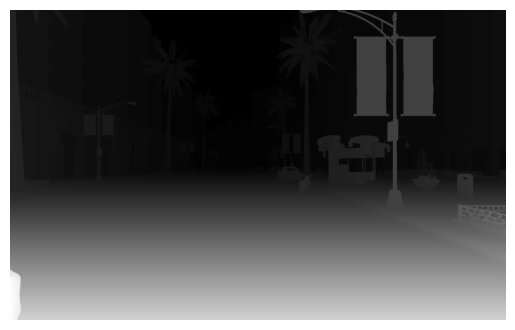

In [6]:
depth_true = cv2.imread('images/gt_disp/466.png', cv2.IMREAD_UNCHANGED)
plt.imshow(depth_true, cmap='gray')
plt.axis("off") 

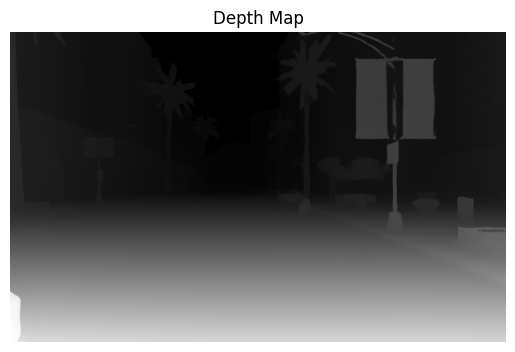

In [7]:
depth_pred_s = test_image('images/left/466.png', model_s)

In [8]:
score, diff = ssim(depth_pred_s, depth_true, full=True, data_range=255)
score

0.7934590103563588

(-0.5, 1919.5, 1199.5, -0.5)

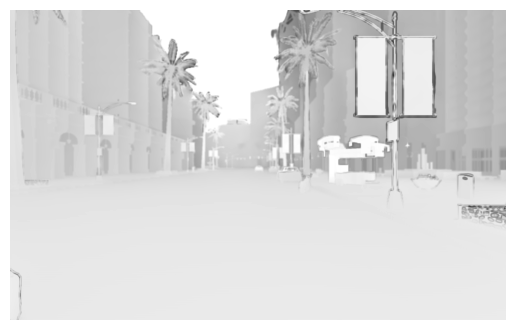

In [9]:
plt.imshow(diff, cmap='gray')
plt.axis('off')

Trying on 515.png image

(-0.5, 1919.5, 1199.5, -0.5)

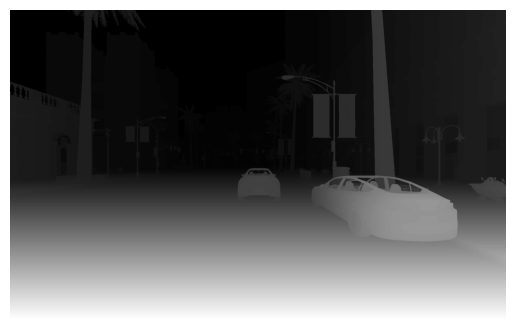

In [10]:
depth_true = cv2.imread('images/gt_disp/515.png', cv2.IMREAD_UNCHANGED)
plt.imshow(depth_true, cmap='gray')
plt.axis("off") 

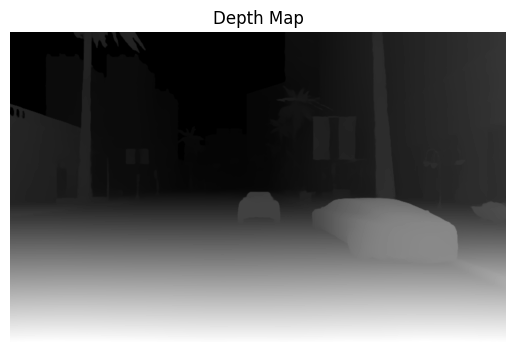

In [11]:
depth_pred_s = test_image('images/left/515.png', model_s)

In [12]:
score, diff = ssim(depth_pred_s, depth_true, full=True, data_range=255)
score

0.704897427856405

(-0.5, 1919.5, 1199.5, -0.5)

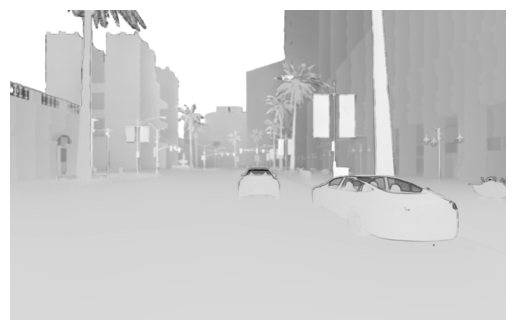

In [13]:
plt.imshow(diff, cmap='gray')
plt.axis('off')

### Depth Estimation

Trying on 466.png image

In [14]:
from metric_depth.depth_anything_v2.dpt import DepthAnythingV2

xFormers not available
xFormers not available


In [15]:
encoder = 'vits' 
dataset = 'vkitti' # 'hypersim' for indoor model, 'vkitti' for outdoor model
max_depth = 80 # 20 for indoor model, 80 for outdoor model

model_s = DepthAnythingV2(**{**model_configs[encoder], 'max_depth': max_depth})
model_s.load_state_dict(torch.load(f'checkpoints/depth_anything_v2_metric_{dataset}_{encoder}.pth', map_location='cpu'))
model_s = model_s.to(DEVICE).eval()

(-0.5, 1919.5, 1199.5, -0.5)

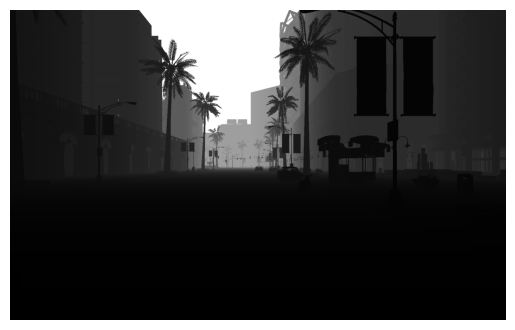

In [16]:
depth_true = cv2.imread('images/gt_depth/466.png', cv2.IMREAD_UNCHANGED)
plt.imshow(depth_true, cmap='gray')
plt.axis("off") 

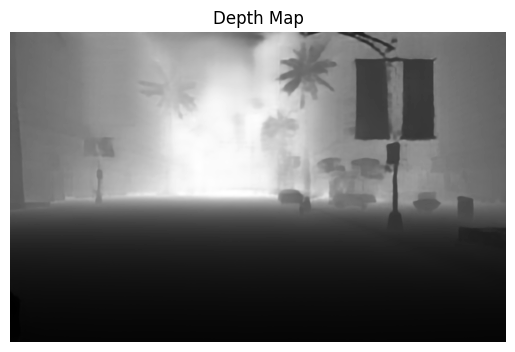

In [17]:
depth_pred_s = test_image('images/left/466.png', model_s)

In [18]:
score, diff = ssim(depth_pred_s, depth_true, full=True, data_range=255)
score

0.41731586829731643

(-0.5, 1919.5, 1199.5, -0.5)

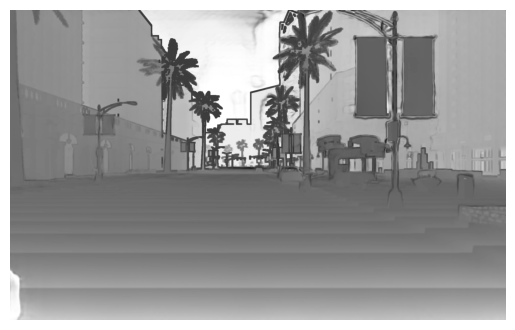

In [19]:
plt.imshow(diff, cmap='gray')
plt.axis('off')